In [21]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import cvxpy as cvx
import warnings
warnings.filterwarnings('ignore')



In [22]:
# data points in column vector input, output
x = np.array([[0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]]).transpose()
y = np.array([[0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]]).transpose()

m = y.shape[0]
A = np.concatenate((x,np.ones((m,1))),1)

#theta = LA.inv(A.transpose().dot(A)).dot(A.transpose()).dot(y)


[[ 0.68531634]
 [ 0.62587346]]


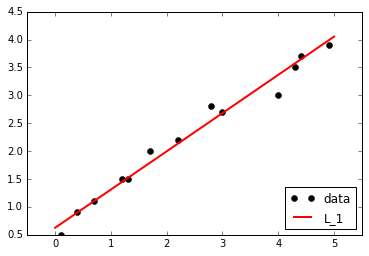

In [23]:
%matplotlib inline
#only for python2
#optimiza theta  use norm 1

theta1 = cvx.Variable(A.shape[1])
objective = cvx.Minimize(cvx.norm1(A*theta1 - y))
constraints = []
prob = cvx.Problem(objective, constraints)
result = prob.solve()
print(theta1.value)

#to plot
plt.plot(x, y, 'ko')
xp1 = np.linspace(0, 5, 500)
yp1 = theta1[0].value*xp1 + theta1[1].value


plt.plot(xp1, yp1, 'r-', linewidth = 2)

plt.axis('equal')
plt.legend(['data', 'L_1'], loc = 4)
plt.show()

[[ 0.67129519]
 [ 0.65306531]]


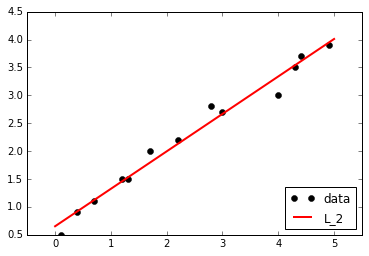

In [24]:
%matplotlib inline
#only for python2
#optimiza theta  use norm 1

theta2 = cvx.Variable(A.shape[1])
objective = cvx.Minimize(cvx.norm2(A*theta2 - y))
constraints = []
prob = cvx.Problem(objective, constraints)
result = prob.solve()
print(theta2.value)

#to plot
plt.plot(x, y, 'ko')
xp2 = np.linspace(0, 5, 500)
yp2 = theta2[0].value*xp2 + theta2[1].value


plt.plot(xp2, yp2, 'r-', linewidth = 2)

plt.axis('equal')
plt.legend(['data', 'L_2'], loc = 4)
plt.show()

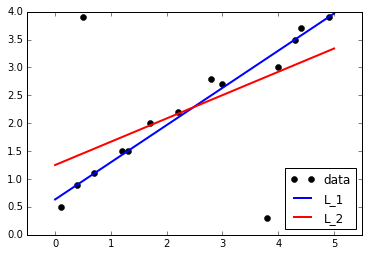

In [25]:
%matplotlib inline
#only for python2
#optimiza theta  use norm 1

x= np.array([[0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]]).transpose()
y = np.array([[0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]]).transpose()

#add outliers
x = np.concatenate((x,np.array([[0.5], [3.8]])))
y = np.concatenate((y,np.array([[3.9], [0.3]])))

m = y.shape[0]
A = np.concatenate((x,np.ones((m,1))),1)

#use norm1

theta1 = cvx.Variable(A.shape[1])
objective = cvx.Minimize(cvx.norm1(A*theta1 - y))
constraints = []
prob = cvx.Problem(objective, constraints)
result = prob.solve()

#to plot
plt.plot(x, y, 'ko')
xp1 = np.linspace(0, 5, 500)
yp1 = theta1[0].value*xp1 + theta1[1].value


#use norm2

theta2 = cvx.Variable(A.shape[1])
objective = cvx.Minimize(cvx.norm2(A*theta2 - y))
constraints = []
prob = cvx.Problem(objective, constraints)
result = prob.solve()


plt.plot(xp1, yp1, 'b-', linewidth = 2)

xp2 = np.linspace(0, 5, 500)
yp2 = theta2[0].value*xp2 + theta2[1].value


plt.plot(xp2, yp2, 'r-', linewidth = 2)
plt.axis('equal')
plt.legend(['data', 'L_1', 'L_2'], loc = 4)
plt.show()

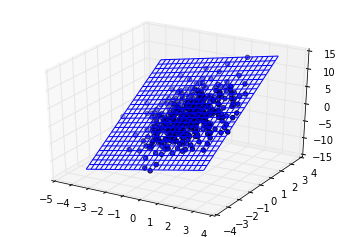

In [26]:
%matplotlib inline
# Data Generation
from mpl_toolkits.mplot3d import Axes3D

n = 500

x1 = np.random.randn(n,1)
x2 = np.random.randn(n,1)

real_theta1 = 1;
real_theta2 = 3;
real_theta3 = 2;

e = 0.5*np.random.randn(n,1)
y = real_theta1*x1 + real_theta2*x2 + e

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y)


A = np.concatenate((x1, x2, np.ones((n,1))), 1)
theta = LA.inv(A.transpose().dot(A)).dot(A.transpose()).dot(y)

[X1, X2] = np.meshgrid(np.linspace(np.min(x1), np.max(x1), 25),
                      np.linspace(np.min(x2), np.max(x2), 25))

yhat = theta[0]*X1 + theta[1]*X2 + theta[2]
ax.plot_wireframe(X1, X2, yhat)
plt.show()


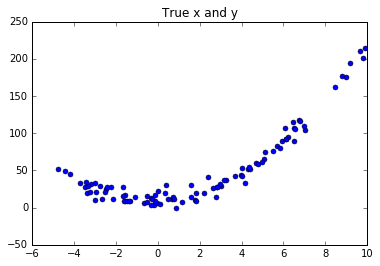

In [27]:
%matplotlib inline

# y = theta(1)x + theta(2)x^2 + theta(3) + noise

n = 100 # number of data points

x = -5 + 15*np.random.rand(n,1)

real_theta1 = 2
real_theta2 = 1
real_theta3 = 10

noise = 8*np.random.randn(n,1);

y = real_theta1*x**2 + real_theta2*x + real_theta3 + noise

plt.plot(x, y, 'o', markersize = 5)
plt.title('True x and y')
plt.show()
%matplotlib inline

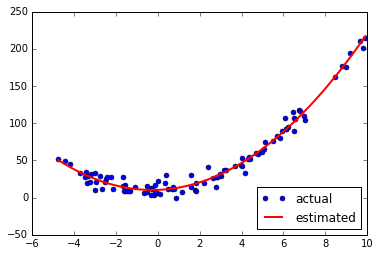

In [28]:
%matplotlib inline

A = np.concatenate((x**2, x, np.ones((n, 1))), 1)
theta = LA.inv(np.dot(A.transpose(),A)).dot(A.transpose()).dot(y)

xpt = np.linspace(np.min(x),np.max(x))
ypt = theta[0]*(xpt**2) + theta[1]*xpt + theta[2]

plt.plot(x, y, 'bo', markersize = 5)
plt.plot(xpt, ypt, 'r', linewidth = 2)
plt.legend(['actual', 'estimated'], loc = 4)
plt.show()


overfitting

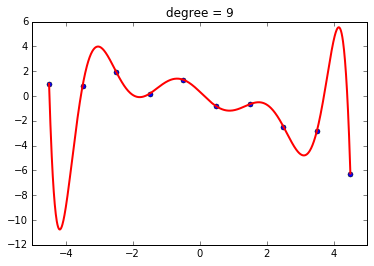

In [29]:
%matplotlib inline

x = [x_cont/10. for x_cont in range(-45,46,10)]
x = np.array([x])
y = np.array([[0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]])

x = x.transpose()
y = y.transpose()

xpt = [xpt_cont/100. for xpt_cont in range(-450,451)]
xpt = np.array([xpt]).transpose()

n_x = x.shape[0] # # of x date
n_xpt = xpt.shape[0]

Phi = np.zeros((n_x, 10))
polybasis = np.zeros((n_xpt, 10))

for i in range(0,10):
    Phi[:, i] = x[:, 0]**i
    polybasis[:, i] = xpt[:, 0]**i
    
theta = (LA.inv(Phi.transpose().dot(Phi))).dot(Phi.transpose()).dot(y)
ypt = polybasis.dot(theta)


plt.plot(x, y, 'bo', markersize = 5)
plt.plot(xpt, ypt, 'r', linewidth = 2)
plt.axis([-5, 5, -12, 6])
plt.title("degree = 9")
plt.show()


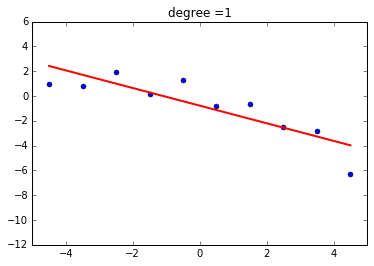

In [30]:
%matplotlib inline

def plot_overfiting_poly(m=1):
    x = [x_cont/10. for x_cont in range(-45,46,10)]
    x = np.array([x])
    y = np.array([[0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]])

    x = x.transpose()
    y = y.transpose()

    xpt = [xpt_cont/100. for xpt_cont in range(-450,451)]
    xpt = np.array([xpt]).transpose()

    n_x = x.shape[0] # num of x date
    n_xpt = xpt.shape[0]

    poly_num = m+1
    
    
    Phi = np.zeros((n_x, poly_num))
    polybasis = np.zeros((n_xpt, poly_num))

    for i in range(0,poly_num):
        Phi[:, i] = x[:, 0]**i
        polybasis[:, i] = xpt[:, 0]**i
        
    theta = (LA.inv(Phi.transpose().dot(Phi))).dot(Phi.transpose()).dot(y)
    ypt = polybasis.dot(theta)
    
    plt.plot(x, y, 'bo', markersize = 5)
    plt.plot(xpt, ypt, 'r', linewidth = 2)
    plt.axis([-5, 5, -12, 6])  
    title = 'degree =%s' % str(m)  
    plt.title(title)
    plt.show()
    

from IPython.html.widgets import interact
interact(plot_overfiting_poly, m=[0, 9, 1]);


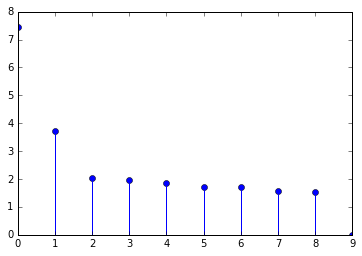

In [31]:
%matplotlib inline

x = [x_cont/10. for x_cont in range(-45,46,10)]
x = np.array([x])
y = np.array([[0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]])

x = x.transpose()
y = y.transpose()

xpt = [xpt_cont/100. for xpt_cont in range(-450,451)]
xpt = np.array([xpt]).transpose()

n_x = x.shape[0] # num of x date
n_xpt = xpt.shape[0]


RSS = []

for m in range(0, 10):

    poly_num = m+1
    
    Phi = np.zeros((n_x, poly_num))
    polybasis = np.zeros((n_xpt, poly_num))

    for i in range(0,poly_num):
        Phi[:, i] = x[:, 0]**i
        polybasis[:, i] = xpt[:, 0]**i
    
    
    theta = (LA.inv(Phi.transpose().dot(Phi))).dot(Phi.transpose()).dot(y)
    ypt = polybasis.dot(theta)
    
    RSS.append(LA.norm(y - Phi.dot(theta),2))
   

plt.stem(RSS) 
plt.show()

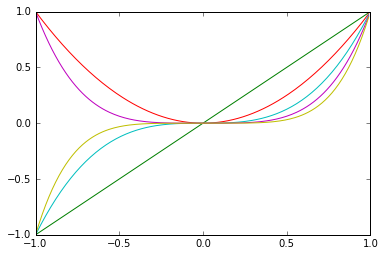

In [32]:
%matplotlib inline

xpt = [num/100. for num in range(-100,100,1)]
xpt = np.array([xpt])
xpt = xpt.transpose()

polybasis_num = xpt.shape[0]
polybasis = np.zeros((polybasis_num, 6))

for i in range(0,6):
    polybasis[:, i] = xpt[:,0]**i

plt.plot(xpt, polybasis)
plt.show()


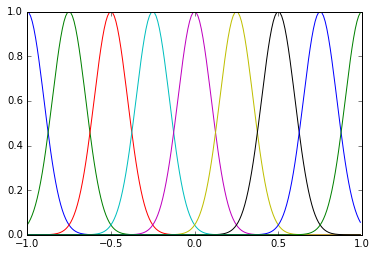

In [33]:
%matplotlib inline

xpt = [num/100. for num in range(-100,100,1)]
xpt = np.array([xpt])
xpt = xpt.transpose()

# num of RBF
d = 9
# sigma of RBF
sigma = 0.1

u = np.array(np.linspace(-1, 1, d))

rbfbasis_num = xpt.shape[0]
rbfbasis = np.zeros((rbfbasis_num, d))


for i in range(0,d):
    rbfbasis[:, i] = np.exp((-(xpt-u[i])**2)/(2*sigma**2))[:,0]

plt.plot(xpt, rbfbasis)
plt.show()



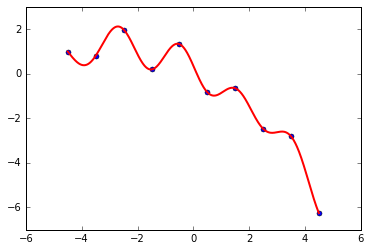

In [34]:
%matplotlib inline

# data generate
x = [x_cont/10. for x_cont in range(-45,46,10)]
x = np.array([x])
y = np.array([[0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]])

x = x.transpose()
y = y.transpose()

xpt = [xpt_cont/100. for xpt_cont in range(-450,451)]
xpt = np.array([xpt]).transpose()


# number of RBF
d = 10
u = np.array(np.linspace(-4.5, 4.5, d))
# sigma of RBF
sigma = 1

Phi_x = x.shape[0]
Phi = np.zeros((Phi_x, d))

rbfbasis_num = xpt.shape[0]
rbfbasis = np.zeros((rbfbasis_num, d))

for i in range(0,d):
    Phi[:, i] = np.exp((-(x-u[i])**2)/(2*sigma**2))[:,0]
    rbfbasis[:, i] = np.exp((-(xpt-u[i])**2)/(2*sigma**2))[:,0]

theta = (LA.inv(Phi.transpose().dot(Phi))).dot(Phi.transpose()).dot(y)

ypt = rbfbasis.dot(theta)

plt.plot(x, y, 'bo', markersize = 5)
plt.plot(xpt, ypt, 'r', linewidth = 2)
plt.show() 



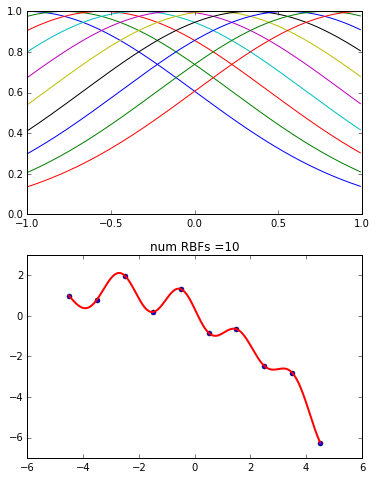

In [35]:
def RBF_plot(sigma = 1, numRBF = 10):
    #data generate
    x = [x_cont/10. for x_cont in range(-45,46,10)]
    x = np.array([x])
    y = np.array([[0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]])

    x = x.transpose()
    y = y.transpose()
    
    xpt = [xpt_cont/100. for xpt_cont in range(-450,451)]
    xpt = np.array([xpt]).transpose()
    
    #num of RBF
    numRBF = numRBF
    u = np.array(np.linspace(-4.5, 4.5, numRBF))
    #sigma of RBF
    sigma = sigma
    
 
    xpt_RBF = [num/100. for num in range(-100,100,1)]
    xpt_RBF = np.array([xpt_RBF]).transpose()
    u_RBF_graph = np.array(np.linspace(-1, 1, numRBF))


    Phi_x = x.shape[0]
    Phi = np.zeros((Phi_x, numRBF))

    rbfbasis_num = xpt.shape[0]
    rbfbasis = np.zeros((rbfbasis_num, numRBF))
    

    rbfbasis_RBF_n = xpt_RBF.shape[0]
    rbfbasis_RBF = np.zeros((rbfbasis_RBF_n, numRBF))
    
    for i in range(0, numRBF):
        Phi[:, i] = np.exp((-(x-u[i])**2)/(2*sigma**2))[:,0]
        rbfbasis[:, i] = np.exp((-(xpt-u[i])**2)/(2*sigma**2))[:,0]

        rbfbasis_RBF[:, i] = np.exp((-(xpt_RBF-u_RBF_graph[i])**2)/(2*sigma**2))[:,0]

    theta = (LA.inv(Phi.transpose().dot(Phi))).dot(Phi.transpose()).dot(y)    
    ypt = rbfbasis.dot(theta)
    
    plt.subplot(2,1,1)

    plt.plot(xpt_RBF, rbfbasis_RBF)
    plt.xlim([-1.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.subplot(2,1,2)
    
    title = 'num RBFs =%s' % str(numRBF)
    plt.title(title)
    plt.plot(x, y, 'bo', markersize = 5)
    plt.plot(xpt, ypt, 'r', linewidth = 2)
    plt.xlim([-6.0, 6.0])
    plt.ylim([-7.0, 3.0])
    plt.show()
    

%pylab inline
pylab.rcParams['figure.figsize'] = (6, 8)
from IPython.html.widgets import interact
interact(RBF_plot, sigma=[0, 10, 0.1], numRBF=[0, 10, 1]);

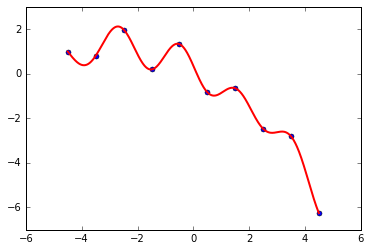

In [36]:
%matplotlib inline

#data generate
x = [x_cont/10. for x_cont in range(-45,46,10)]
x = np.array([x])
y = np.array([[0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]])

x = x.transpose()
y = y.transpose()

xpt = [xpt_cont/100. for xpt_cont in range(-450,451)]
xpt = np.array([xpt]).transpose()

#num of RBF
d = 10
u = np.array(np.linspace(-4.5, 4.5, d))
#sigma of RBF
sigma = 1


Phi_n = x.shape[0]
Phi = np.zeros((Phi_n, d))

rbfbasis_num = xpt.shape[0]
rbfbasis = np.zeros((rbfbasis_num, d))


for i in range(0, d):
    Phi[:, i] = np.exp((-(x-u[i])**2)/(2*sigma**2))[:,0]
    rbfbasis[:, i] = np.exp((-(xpt-u[i])**2)/(2*sigma**2))[:,0]
    

#theta = (LA.inv(Phi.transpose().dot(Phi))).dot(Phi.transpose()).dot(y)

theta = cvx.Variable(d)
objective = cvx.Minimize(cvx.norm2(Phi*theta-y))
constraints = []
prob = cvx.Problem(objective, constraints)
result = prob.solve()

ypt = rbfbasis.dot(theta.value)


plt.plot(x, y, 'bo', markersize = 5)
plt.plot(xpt, ypt, 'r', linewidth = 2)
plt.show() 

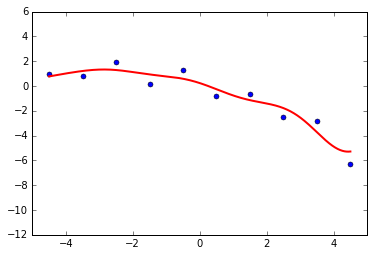

In [37]:
%matplotlib inline

#data generate
x = [x_cont/10. for x_cont in range(-45,46,10)]
x = np.array([x])
y = np.array([[0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]])

x = x.transpose()
y = y.transpose()

xpt = [xpt_cont/100. for xpt_cont in range(-450,451)]
xpt = np.array([xpt]).transpose()


d = 10;
u = np.array(np.linspace(-4.5, 4.5, d))
sigma = 1


Phi_x = x.shape[0]
Phi = np.zeros((Phi_x, d))

rbfbasis_num = xpt.shape[0]
rbfbasis = np.zeros((rbfbasis_num, d))

for i in range(0, d):
    Phi[:, i] = np.exp((-(x-u[i])**2)/(2*sigma**2))[:,0]
    rbfbasis[:, i] = np.exp((-(xpt-u[i])**2)/(2*sigma**2))[:,0]
    
theta = cvx.Variable(d)

lambda_regul = 0.1

objective = cvx.Minimize(cvx.sum_squares(Phi*theta-y) + lambda_regul*cvx.sum_squares(theta) )
constraints = []
prob = cvx.Problem(objective, constraints)
result = prob.solve()

ypt = rbfbasis.dot(theta.value)


plt.plot(x, y, 'bo', markersize = 5)
plt.plot(xpt, ypt, 'r', linewidth = 2)
plt.axis([-5, 5, -12, 6])
plt.show() 

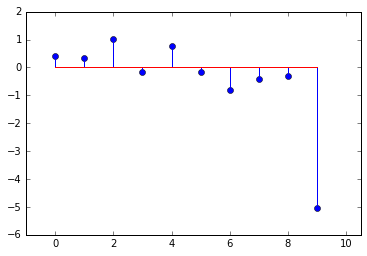

In [38]:
%matplotlib inline

plt.stem(theta.value)
plt.xlim([-1.0, 10.5])
plt.show()

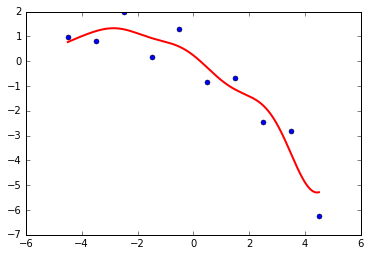

In [39]:
def Regularization(Lambda = 0.1):
    lambda_regul = Lambda
    
    x = [x_cont/10. for x_cont in range(-45,46,10)]
    x = np.array([x])
    y = np.array([[0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]])

    x = x.transpose()
    y = y.transpose()

    xpt = [xpt_cont/100. for xpt_cont in range(-450,451)]
    xpt = np.array([xpt]).transpose()


    d = 10;
    u = np.array(np.linspace(-4.5, 4.5, d))

    sigma = 1

    Phi_x = x.shape[0]
    Phi = np.zeros((Phi_x, d))

    rbfbasis_num = xpt.shape[0]
    rbfbasis = np.zeros((rbfbasis_num, d))

    for i in range(0, d):
        Phi[:, i] = np.exp((-(x-u[i])**2)/(2*sigma**2))[:,0]
        rbfbasis[:, i] = np.exp((-(xpt-u[i])**2)/(2*sigma**2))[:,0]

    #theta = (LA.inv(Phi.transpose().dot(Phi))).dot(Phi.transpose()).dot(y)

    theta = cvx.Variable(d)
    
    objective = cvx.Minimize(cvx.sum_squares(Phi*theta-y) + lambda_regul*cvx.sum_squares(theta) )
    constraints = []
    prob = cvx.Problem(objective, constraints)
    result = prob.solve()

    ypt = rbfbasis.dot(theta.value)


    plt.plot(x, y, 'bo', markersize = 5)
    plt.plot(xpt, ypt, 'r', linewidth = 2)
    plt.show() 
from IPython.html.widgets import interact
interact(Regularization, Lambda=[0, 5, 0.1]);

Lasso

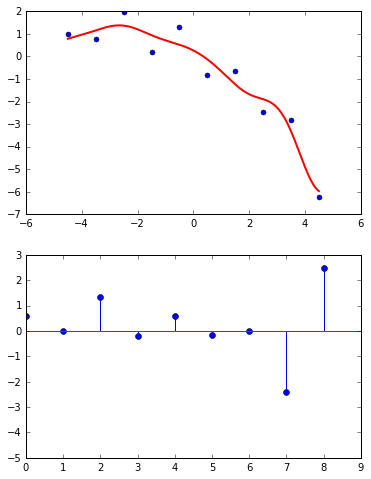

In [40]:
def Regularization(Lambda = 0.1, norm = 1):
    lambda_regul = Lambda
    
    x = [x_cont/10. for x_cont in range(-45,46,10)]
    x = np.array([x])
    y = np.array([[0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]])

    x = x.transpose()
    y = y.transpose()

    xpt = [xpt_cont/100. for xpt_cont in range(-450,451)]
    xpt = np.array([xpt]).transpose()


    d = 10;
    u = np.array(np.linspace(-4.5, 4.5, d))

    sigma = 1

    #공간 생성
    Phi_x = x.shape[0]
    Phi = np.zeros((Phi_x, d))

    rbfbasis_num = xpt.shape[0]
    rbfbasis = np.zeros((rbfbasis_num, d))

    for i in range(0, d):
        Phi[:, i] = np.exp((-(x-u[i])**2)/(2*sigma**2))[:,0]
        rbfbasis[:, i] = np.exp((-(xpt-u[i])**2)/(2*sigma**2))[:,0]

    #theta = (LA.inv(Phi.transpose().dot(Phi))).dot(Phi.transpose()).dot(y)

    theta = cvx.Variable(d)
    
    objective = cvx.Minimize(cvx.sum_squares(Phi*theta-y) + lambda_regul*cvx.norm(theta, norm) )
    constraints = []
    prob = cvx.Problem(objective, constraints)
    result = prob.solve()

    ypt = rbfbasis.dot(theta.value)

    plt.subplot(2, 1, 1)
    plt.plot(x, y, 'bo', markersize = 5)
    plt.plot(xpt, ypt, 'r', linewidth = 2)
    
    plt.subplot(2, 1, 2)
    plt.stem(theta.value)
    plt.ylim([-5.0,3.0])
    plt.show() 
    

%pylab inline
pylab.rcParams['figure.figsize'] = (6, 8)
from IPython.html.widgets import interact
interact(Regularization, Lambda=[0, 5, 0.1], norm=[1, 2 ,1]);